In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path as path
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# paths for the directories
home_dir = path.cwd().parent                                  # home directory
data_dir = home_dir / 'data'                                  # data directory
iterim_data_dir = data_dir / 'interim'                        # interim data directory path
dataset_path = iterim_data_dir / "flat-house-dataset_v2.csv"  # dataset path

In [5]:
# loading the dataset into pandas dataframe
df = pd.read_csv(dataset_path)

# checking few rows from the dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3.0,3,2,...,NaN,1730.00,NaN,0,0,0,0,0,0,65
1,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,3,3+,...,2003.0,1338.29,986.41,1,0,0,1,0,0,86
2,flat,umang winter hills,sector 77,0.75,5588.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up...,2.0,2,2,...,1342.0,1140.00,969.00,0,0,0,0,1,0,102
3,flat,shree vardhman flora,sector 90,0.92,4717.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3.0,3,2,...,NaN,NaN,1950.00,0,0,0,1,0,0,49
4,flat,dlf park place,sector 54,4.85,30180.0,1607.0,Super Built up area 1983(184.23 sq.m.)Built Up...,3.0,4,3+,...,1983.0,1785.00,1607.00,1,0,0,0,0,1,158


In [6]:
# checking the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (3793, 23)


In [7]:
# taking a brief overview over the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3793 non-null   object 
 1   society              3793 non-null   object 
 2   sector               3793 non-null   object 
 3   price                3775 non-null   float64
 4   price_per_sqft       3775 non-null   float64
 5   area                 3775 non-null   float64
 6   areaWithType         3793 non-null   object 
 7   bedRoom              3793 non-null   float64
 8   bathroom             3793 non-null   int64  
 9   balcony              3793 non-null   object 
 10  floorNum             3776 non-null   float64
 11  facing               2695 non-null   object 
 12  agePossession        3793 non-null   object 
 13  super_built_up_area  1913 non-null   float64
 14  built_up_area        1731 non-null   float64
 15  carpet_area          1938 non-null   f

In [8]:
# checking for the duplicated rows in the dataset
print(f"Count of the duplicated rows in the dataset: {df.duplicated().sum()}")

Count of the duplicated rows in the dataset: 125


In [9]:
# removing the duplicated rows from the dataset
df.drop_duplicates(inplace=True)

### Feature Name: property_type

flats are 76.58% of the total dataset
houses are 23.42% of the total dataset


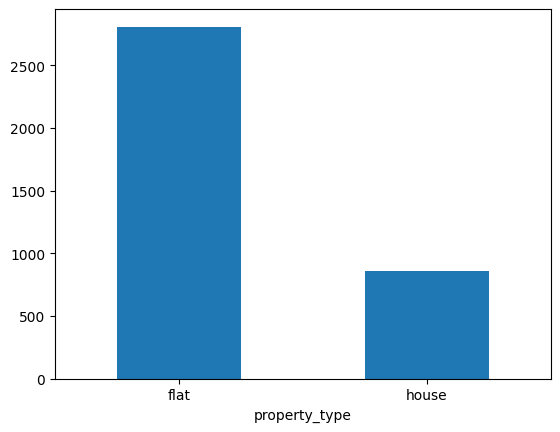

In [10]:
# calculate the value count for property_type
property_type_count = df['property_type'].value_counts()
print(f"flats are {round(property_type_count['flat']/property_type_count.sum() *100, 2)}% of the total dataset")
print(f"houses are {round(property_type_count['house']/property_type_count.sum() *100, 2)}% of the total dataset")

# plotting the graph
df['property_type'].value_counts().plot(kind='bar', rot=0);

In [11]:
# checking for the null values in 'property_type' column
df.property_type.isnull().sum()

0

### Observations
- flats are in majority approx 76 percent and there are less numbers of houses approx 23 percent
- No missing values

### Feature Name: society

In [12]:
# count of unique societies
print(f"Total unique society in the dataset: {df['society'].value_counts().count()}")

Total unique society in the dataset: 671


In [13]:
# taking a look at the society names
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
hector trimurti heights                   1
awho sispal vihar                         1
aipl joy square                           1
kamal residence                           1
eros wembley estate                       1
Name: count, Length: 671, dtype: int64

In [14]:
# when we consider 'non-independent' society, we can obeserve that top 75 society represent the approx 50% of the data

# `normalize=True` argument ensures that the counts are represented as proportion of total, adding up to 1
# 'cumsum()' This function calculates the cumulative sum of the society type proportions.\
# for each society type, it adds its proportion to the proportion of all society types before it. \
# this creates a running total of the percentage of properties belonging to each society type (excluding 'independent')

df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023570
ss the leaf                             0.046512
dlf new town heights                    0.059711
shapoorji pallonji joyville gurugram    0.072910
signature global park                   0.083909
                                          ...   
indiabulls enigma                       0.491829
dlf the primus                          0.495915
umang monsoon breeze                    0.500000
mvn athens                              0.503771
unitech uniworld resorts                0.507542
Name: proportion, Length: 75, dtype: float64

In [15]:
# unique societies in the dataset
society_counts = df['society'].value_counts()

# keeping the society distribution in bins for easy understanding
# frequency distribution for society

frequency_bins = {
    "Very High (>100)":(society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts <=50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

# for better visulaization, converting it into pandas dataframe
society_freq_df = pd.DataFrame.from_dict(frequency_bins, orient='index', columns=['frequency_count'])

society_freq_df

,frequency_count
Very High (>100),1
High (50-100),2
Average (10-49),92
Low (2-9),272
Very Low (1),304


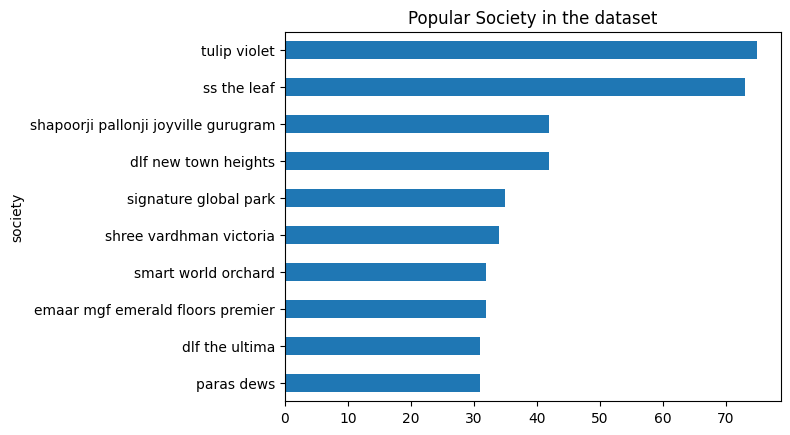

In [16]:
# plotting the top 10 society in the dataset
df[df['society'] != 'independent']['society'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.title('Popular Society in the dataset');

In [17]:
# checking for null values in 'society' column
df['society'].isnull().sum()

0

In [18]:
# Calculate the count of properties flagged as "independent"
independent_society_count = df[df['society']=='independent']['society'].count()

# Calculate the percentage of "independent" properties
percentage_independent = round(independent_society_count / df.shape[0] * 100, 2)

# Print the result
print(f"{percentage_independent}% of properties are flagged as independent in the dataset")


13.25% of properties are flagged as independent in the dataset


### observations

- Around 13% properties comes under independent tag.
- There are 671 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 272 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 3084 societies, have only 1 listing.

### Observations

- Approximately 13% of the properties fall under the independent tag.

- There are a total of 671 societies.

- The top 75 societies account for 50% of the properties, while the remaining 50% of the properties are distributed among the other 600 societies.

  - Very High (>100): Only 1 society has more than 100 listings.
  
  - High (50-100): 2 societies have between 50 to 100 listings.
  
  - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
  
  - Low (2-9): 272 societies have between 2 to 9 listings.
  
  - Very Low (1): A significant number, 3084 societies, have only 1 listing.


### Feature Name: sector

In [19]:
# unqiue sectors in the dataset
print(f"Unique sectors in the dataset: {df['sector'].value_counts().count()}")

Unique sectors in the dataset: 106


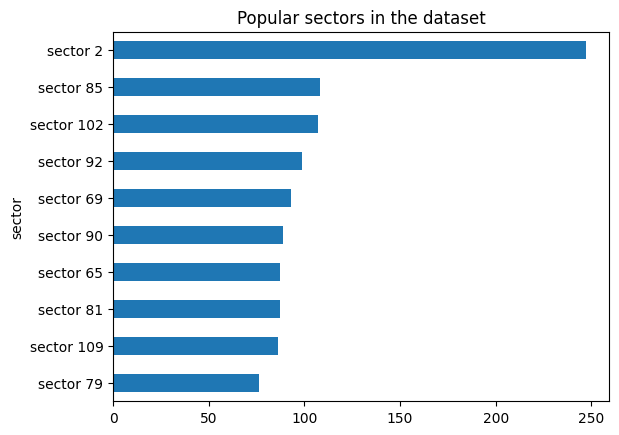

In [20]:
# top 10 sectors in the dataset
df['sector'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.title("Popular sectors in the dataset");

In [21]:
# Frequency distribution for sectors
# Calculate the number of occurrences for each sector in the DataFrame column 'sector'
sector_counts = df['sector'].value_counts()

# Define bins for sector frequency distribution
sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),  # Count sectors with more than 100 occurrences
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),  # Count sectors with 50 to 100 occurrences
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),  # Count sectors with 10 to 49 occurrences
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),  # Count sectors with 2 to 9 occurrences
    "Very Low (1)": (sector_counts == 1).sum()  # Count sectors with only 1 occurrence
}

# for better visulaization, converting it into pandas dataframe
sector_freq_df = pd.DataFrame.from_dict(sector_frequency_bins, orient='index', columns=['frequency_count'])

sector_freq_df

,frequency_count
Very High (>100),3
High (50-100),24
Average (10-49),60
Low (2-9),18
Very Low (1),1


### Observations

- There are a total of 106 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 24 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 18 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Feature Name: price

In [22]:
# checking the missing values in 'price' column
print(f"Missing values in the 'price' column: {df['price'].isnull().sum()}")

Missing values in the 'price' column: 17


In [23]:
# checking the stats detaitls about the 'price' column
df['price'].describe()

count    3651.000000
mean        2.536459
std         2.982068
min         0.070000
25%         0.950000
50%         1.540000
75%         2.750000
max        31.500000
Name: price, dtype: float64

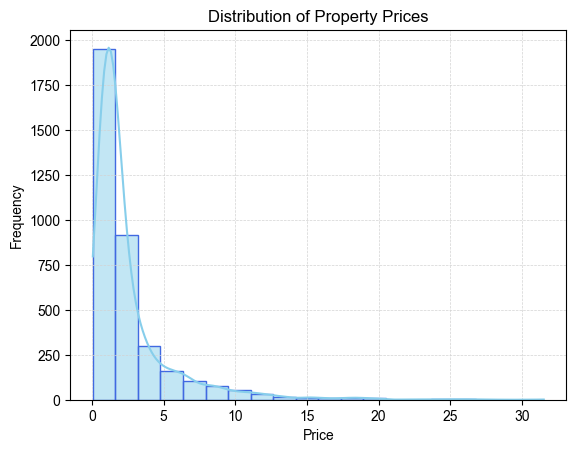

In [24]:
# Plotting the histogram for better visualization
sns.histplot(df['price'], kde=True, bins=20, color='skyblue', edgecolor='royalblue')

sns.set_style("whitegrid")  # Set the background style to white grid for better contrast

plt.title('Distribution of Property Prices')  # Add title to the plot
plt.xlabel('Price')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis

# Add gridlines for better readability
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

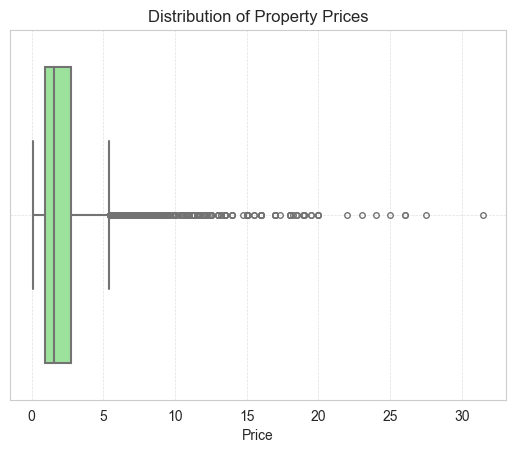

In [25]:
# plotting the box plots for outlier identification
sns.boxplot(x=df['price'], color='lightgreen', linewidth=1.5, fliersize=4)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.show()

### key findings

- `Descriptive Statistics:`
    - Count: 3651 non-missing price entries
    - Mean Price : The average price is approximately 2.53 Cr.
    - Median Price : The median (or 50th percentile) price is 1.54 Cr.
    - Standard Deviation : The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 Cr. to maximum of 31.5 Cr.
    - IQR (Inter Quartile Range) : is from 0.95 Cr. to 2.75 Cr.
- `Visualization:` 
    - Distribution: The histogram indicates that most properties are priced in the lower range(below 5 cr), with few properties going beyond 10 Cr.
    - Box plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 Cr. might be considered outliers as they lie beyond the upper whisker of the box plot

- `Missing values:` 
    - There are 17 Missing values in the price column

In [26]:
# finding the skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.279346411195096 14.92874552820232


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [27]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.375
0.95     8.500
0.99    15.300
Name: price, dtype: float64

### Quantile Analysis
- `1% Quantile`: Only 1% of properties are priced below 0.25 crores.
- `5% Quantile`: 5% of properties are priced below 0.37 crores.
- `95% Quantile`: 95% of properties are priced below 8.5 crores.
- `99% Quantile`: 99% of properties are priced below 15.3 crores, indicating that very few properties are priced above the the value

In [28]:
# Identifying potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

# calculating the IQR
IQR = Q3 - Q1

print(f"IQR value: {IQR}")

IQR value: 1.8


In [29]:
# calculating the lower bound and upper bound 
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f"Lower bound: {lower_bound}\nUpper bound: {upper_bound}")

Lower bound: -1.7500000000000002
Upper bound: 5.45


In [30]:
# Identifying outliers based on price thresholds
outliers = df[(df['price']<lower_bound) | (df['price']>upper_bound)]

# Printing the shape of the dataframe containing the outliers
outliers.shape

(424, 23)

In [31]:
# descriptive statistics of outliers dataframe
outliers['price'].describe()

count    424.000000
mean       9.240896
std        4.068606
min        5.460000
25%        6.455000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

### Key Findings
`Outliers Analysis (Using IQR Method)`:
- Based on the IQR method, there are 424 properties considered as outliers
- These outliers have an average price of approximate 9.24 Crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

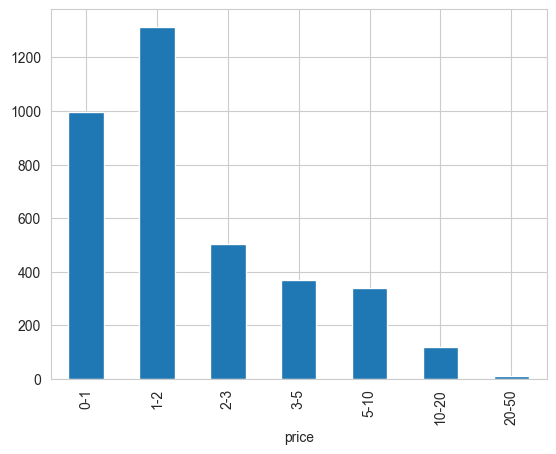

In [32]:
# price binning 

# Defining price bins for categorization
bins = [0, 1, 2, 3, 5, 10, 20, 50]

# Define label for each price bin
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]

# Create price categories based on bins
price_categories = pd.cut(df['price'], bins=bins, labels=bin_labels, right=False) 
# The `right=False` argument ensures that a price on the boundary of two bins falls into the lower bin

# Count the number of properties in price category
price_category_count = price_categories.value_counts().sort_index()

# Plot the price category distribution as a bar chart
price_category_count.plot(kind='bar');


### Key Obeservations
- The majority of properties are in the `1-2 Crores` and `0-1 Crores` price range
- There's a significant drop in in the number of properties priced above `10 Crores`.

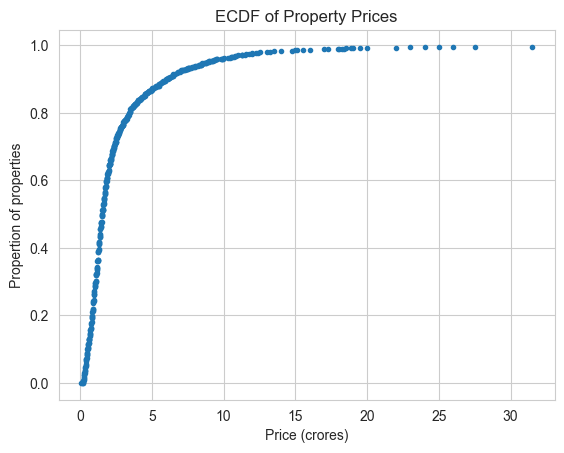

In [33]:
# Calculate the Empirical Cumulative Distribution function (ECDF) for price
ecdf = (df['price'].value_counts()    # Count the occurance of each price
       .sort_index()                  # Sort prices in ascending order 
       .cumsum() / len(df['price']))  # Calculate cumulative propertion

# plot the ECDF 
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none') # plot data points only
plt.grid(True) # Add gridlines

# label the axes 
plt.xlabel('Price (crores)')
plt.ylabel('Propertion of properties')

# title for the plot
plt.title('ECDF of Property Prices')
plt.show()

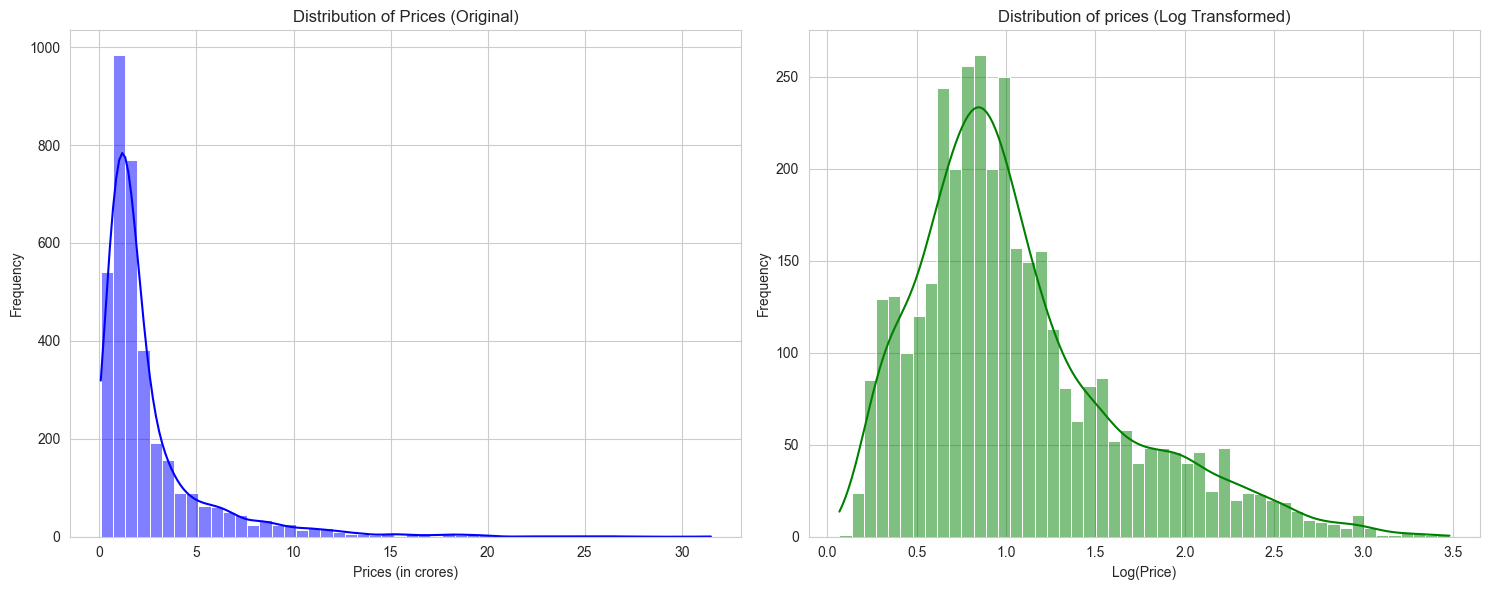

In [34]:
# set a figure size for a wider layout
plt.figure(figsize=(15, 6))

# ----------------------------------------
# Plot 1: Original Price Distribution
# ----------------------------------------

plt.subplot(1, 2, 1) # create the first subplot (out of 1x2 grid)

# create a histogram with KDE for original prices
sns.histplot(df['price'], kde=True, bins=50, color='blue')

# add labels and title
plt.title('Distribution of Prices (Original)')
plt.xlabel('Prices (in crores)')
plt.ylabel('Frequency')

# ----------------------------------------
# Plot 2: Log-Transformed Price Distribution
# ----------------------------------------

plt.subplot(1, 2, 2) # create the second subplot

# Apply log transformation (plus 1 to handle 0 values)
log_prices = np.log1p(df['price'])

# create a histogram with KDE for log-transformed prices
sns.histplot(log_prices, kde=True, bins=50, color='green')

# add labels and title
plt.title("Distribution of prices (Log Transformed)")
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# adjusting the spacing between the subplots
plt.tight_layout()

plt.show()

`np.log1p(x)`: This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [35]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

1.0746672085367073 0.9675499950506277


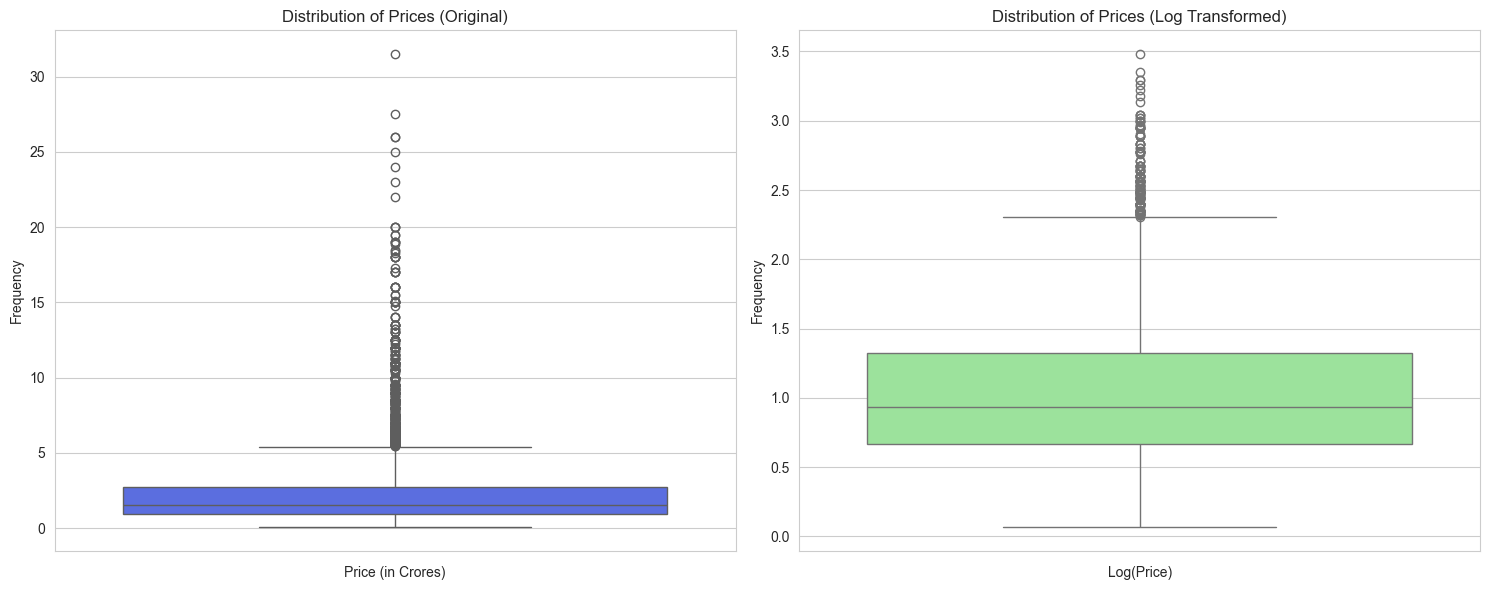

In [36]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='#455ff5')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Feature Name: price_per_sqft

In [37]:
# checking the null values in the 'price_per_sqft' column
df['price_per_sqft'].isnull().sum()

17

In [38]:
# checking stats for 'price_per_sqft' column
df['price_per_sqft'].describe()

count      3651.000000
mean      13912.153109
std       23235.030813
min           4.000000
25%        6825.500000
50%        9022.000000
75%       13888.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

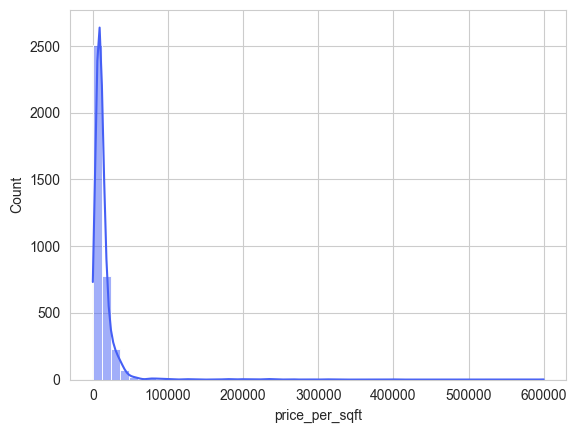

In [39]:
sns.histplot(df['price_per_sqft'] ,bins=50, kde=True, color='#455ff5');

#### Key Observation:
Most properties have a price_per_sqft ranaging from approximately 0 to 400000. There is a significant concentration in lower range, with a few properties having exceptionally high price_sq_ft.

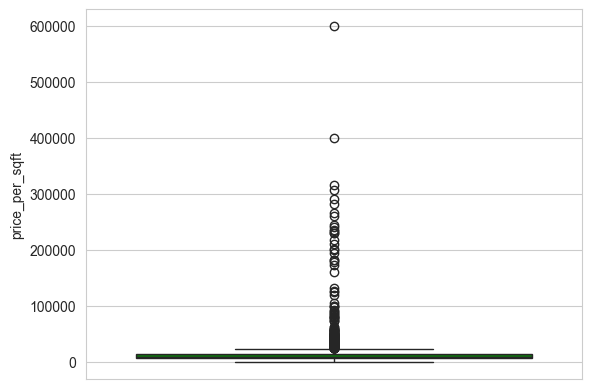

In [40]:
sns.boxplot(df['price_per_sqft'], color='green');

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### Feature Name: bedroom

In [43]:
# checking the missing values in 'bedRoom' column
df['bedRoom'].isnull().sum()

0

In [44]:
# Checking the bedroom counts in a property
df['bedRoom'].value_counts()

bedRoom
3.0     1493
2.0      937
4.0      659
5.0      210
1.0      124
6.0       74
9.0       41
8.0       30
7.0       28
12.0      28
10.0      20
16.0      12
13.0       4
19.0       2
18.0       2
14.0       1
21.0       1
20.0       1
11.0       1
Name: count, dtype: int64

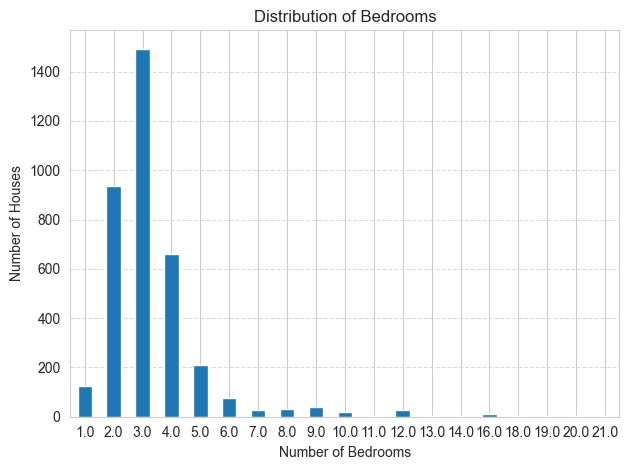

In [49]:
# Visuallizing the above result
# Plot the bar graph with color and grid
df['bedRoom'].value_counts().sort_index().plot(kind='bar', colormap='tab20')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve readability with labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')
plt.title('Distribution of Bedrooms')

# Rotate x-axis labels for better visibility with many categories
plt.xticks(rotation=0)  # For horizontal labels
# plt.xticks(rotation=45)  # For diagonal labels (optional)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


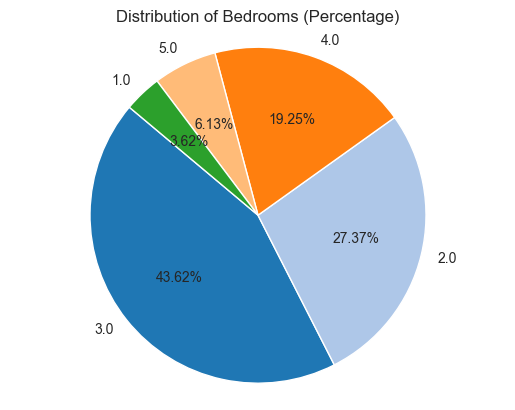

In [55]:
# Plot the pie chart with a custom color palette and labels
wedge_colors = plt.cm.tab20.colors[:len(df['bedRoom'].value_counts().head())]
plt.pie(df['bedRoom'].value_counts(normalize=True).head(), labels=df['bedRoom'].value_counts().head().index, 
        autopct='%0.2f%%', startangle=140, colors=wedge_colors)

# Add a title
plt.title('Distribution of Bedrooms (Percentage)')

# Equal aspect ratio for a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()


### Feature Name: bathroom

In [56]:
# checking the missing values 
df['bathroom'].isnull().sum()

0

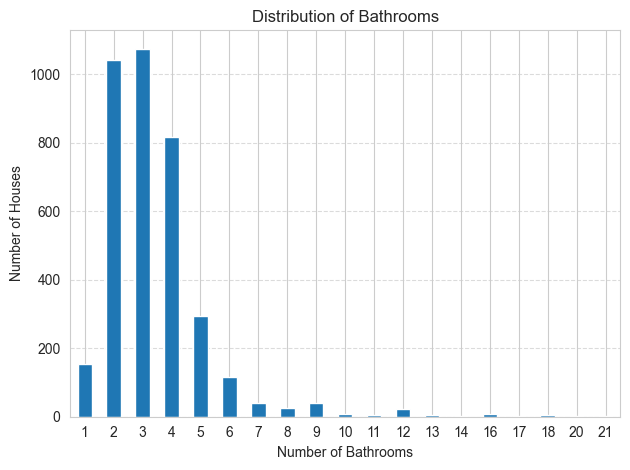

In [59]:
df['bathroom'].value_counts().sort_index().plot(kind='bar', colormap='tab20')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve readability with labels and title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses')
plt.title('Distribution of Bathrooms')

# Rotate x-axis labels for better visibility with many categories
plt.xticks(rotation=0)  # For horizontal labels
# plt.xticks(rotation=45)  # For diagonal labels (optional)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

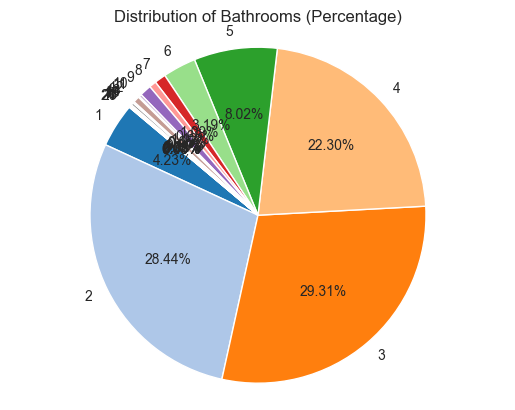

In [73]:
bathroom_counts = df['bathroom'].value_counts().sort_index()

# Plot the pie chart with a custom color palette and labels
wedge_colors = plt.cm.tab20.colors[:len(bathroom_counts)]
plt.pie(bathroom_counts.values, labels=bathroom_counts.keys(), autopct='%0.2f%%', startangle=140, colors=wedge_colors)

# Add a title
plt.title('Distribution of Bathrooms (Percentage)')

# Equal aspect ratio for a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()

### Feature Name: balcony

In [74]:
#  checking for missing values
df['balcony'].isnull().sum()

0

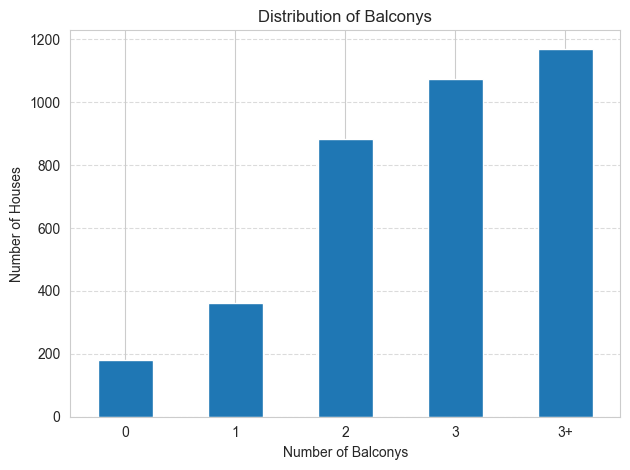

In [75]:
df['balcony'].value_counts().sort_index().plot(kind='bar', colormap='tab20')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve readability with labels and title
plt.xlabel('Number of Balconys')
plt.ylabel('Number of Houses')
plt.title('Distribution of Balconys')

# Rotate x-axis labels for better visibility with many categories
plt.xticks(rotation=0)  # For horizontal labels
# plt.xticks(rotation=45)  # For diagonal labels (optional)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

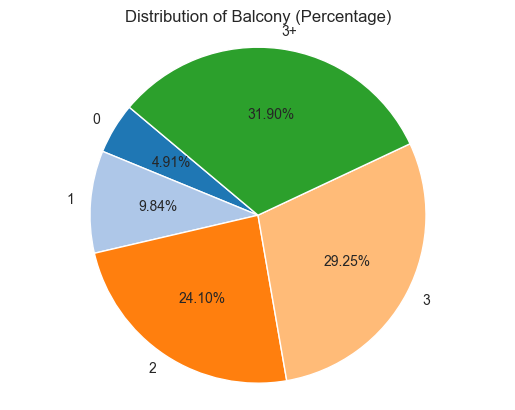

In [78]:
balcony_count = df['balcony'].value_counts().sort_index()

# Plot the pie chart with a custom color palette and labels
wedge_colors = plt.cm.tab20.colors[:len(balcony_count)]
plt.pie(balcony_count.values, labels=balcony_count.keys(), autopct='%0.2f%%', startangle=140, colors=wedge_colors)

# Add a title
plt.title('Distribution of Balcony (Percentage)')

# Equal aspect ratio for a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()

### Feature Name: floorNum

In [82]:
df.iloc[:, 10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,9.0,East,Relatively New,NaN,1730.00,NaN,0,0,0,0,0,0,65
1,4.0,East,Relatively New,2003.0,1338.29,986.41,1,0,0,1,0,0,86
2,8.0,South,Relatively New,1342.0,1140.00,969.00,0,0,0,0,1,0,102
3,6.0,North,Relatively New,NaN,NaN,1950.00,0,0,0,1,0,0,49
4,6.0,North,Moderately New,1983.0,1785.00,1607.00,1,0,0,0,0,1,158


In [83]:
# checking missing  values in the dataset
df['floorNum'].isnull().sum()

17

In [84]:
# checking the stats
df['floorNum'].describe()

count    3651.000000
mean        6.802246
std         6.015624
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

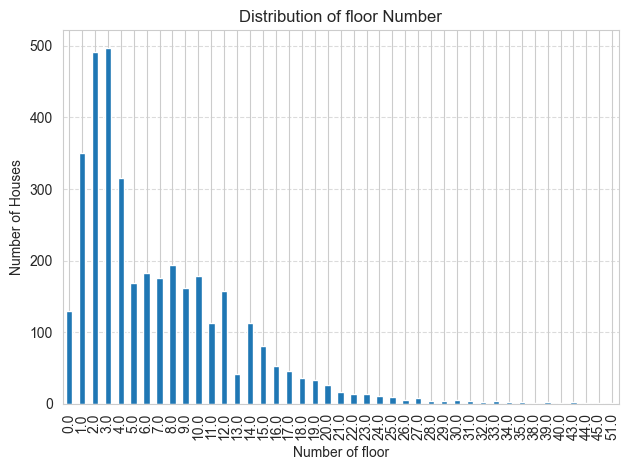

In [86]:
df['floorNum'].value_counts().sort_index().plot(kind='bar', colormap='tab20')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve readability with labels and title
plt.xlabel('Number of floor')
plt.ylabel('Number of Houses')
plt.title('Distribution of floor Number')

# Rotate x-axis labels for better visibility with many categories
plt.xticks(rotation=90)  # For horizontal labels
# plt.xticks(rotation=45)  # For diagonal labels (optional)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

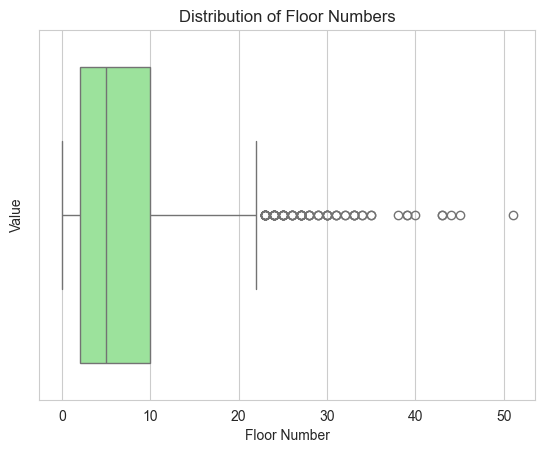

In [94]:
sns.boxplot(
    x=df['floorNum'],
    color='lightgreen'
)

# Add title and labels
plt.title("Distribution of Floor Numbers")
plt.xlabel("Floor Number")
plt.ylabel("Value")

plt.show()


**Concentration in Lower Floors**: A significant majority of the properties are located on floors ranging from the ground floor (0) up to the 25th floor.

**Floors 1-4 Most Popular**: Floors 1 to 4 seem to be particularly popular choices, with the 3rd floor being the most common location.

**Higher Floors Less Frequent**: While some properties are situated on higher floors, their frequency is considerably lower compared to lower floors.

**Focus on Lower Floors**: The box plot visually confirms this trend, showing a concentration of properties around the lower floors. The interquartile range (IQR), which represents the middle 50% of the data, falls between roughly the 2nd and 10th floors.

**Potential Outliers**: There are a few data points that fall outside the "whiskers" of the boxplot, particularly on the higher end. These points could be considered potential outliers and warrant further investigation.

### Feature Name: facing

In [96]:
# checking the missing values
df['facing'].isnull().sum()

1038

In [97]:
# replacing the missing values with 'NA' 
df['facing'].fillna('NA', inplace=True)

In [98]:
# checking the distribution
df['facing'].value_counts()

facing
NA            1038
North-East     623
East           622
North          387
West           249
South          231
North-West     193
South-East     173
South-West     152
Name: count, dtype: int64

### Feature Name: agePossession

In [99]:
# checking for missing values
df['agePossession'].isnull().sum()

0

In [100]:
# checking the unqiue values distribution
df['agePossession'].value_counts()

agePossession
Relatively New        1642
New Property           592
Moderately New         562
Undefined              306
Old Property           302
Under Construction     264
Name: count, dtype: int64

### Feature Name: area